In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objects as go
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
df = pd.read_csv('housing_price_dataset.csv')
df.head()


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


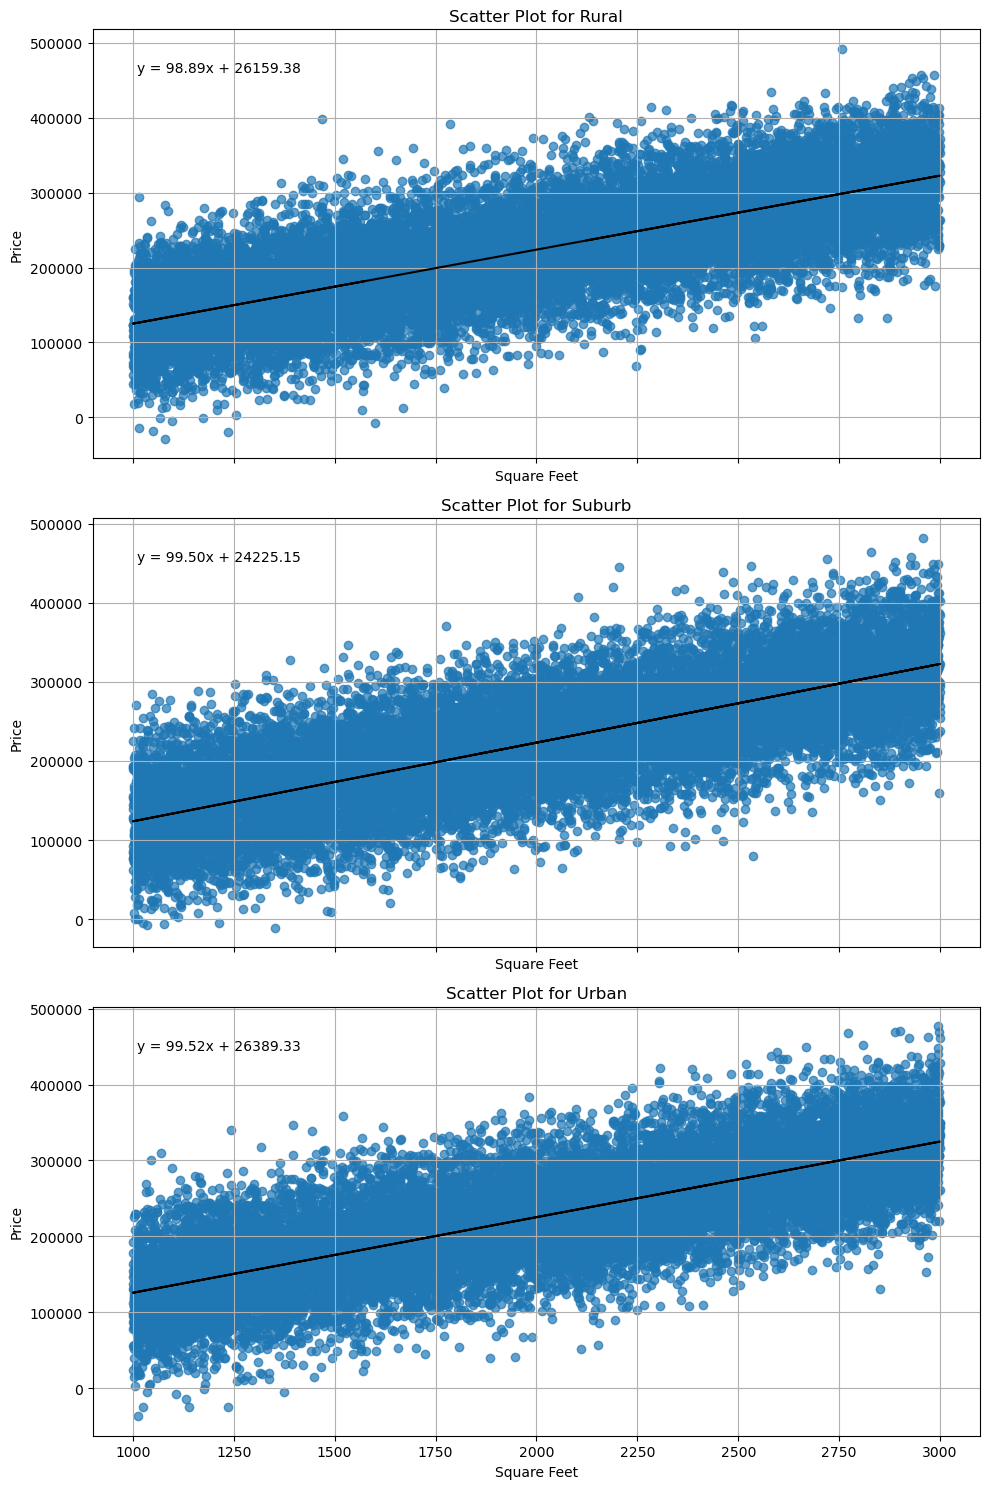

In [50]:
# Assuming 'SquareFeet', 'Price', and 'Neighborhood' are the columns in your DataFrame
# df = pd.read_csv('housing_price_dataset.csv')

# Create subplots for each neighborhood
neighborhoods = df['Neighborhood'].unique()

fig, axs = plt.subplots(len(neighborhoods), 1, figsize=(10, 5 * len(neighborhoods)), sharex=True)

for i, neighborhood in enumerate(neighborhoods):
    subset = df[df['Neighborhood'] == neighborhood]
    
    # Scatter plot
    axs[i].scatter(subset['SquareFeet'], subset['Price'], label=neighborhood, alpha=0.7)
    
    # Fit a linear regression model and plot the trendline
    fit = np.polyfit(subset['SquareFeet'], subset['Price'], 1)
    trendline = np.polyval(fit, subset['SquareFeet'])
    axs[i].plot(subset['SquareFeet'], trendline, label=f'Trendline ({neighborhood})', color='black')
    
    # Annotate the trendline equation on the graph
    equation = f'y = {fit[0]:.2f}x + {fit[1]:.2f}'
    axs[i].annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
    
    # Customize each subplot
    axs[i].set_title(f'Scatter Plot for {neighborhood}')
    axs[i].set_xlabel('Square Feet')
    axs[i].set_ylabel('Price')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

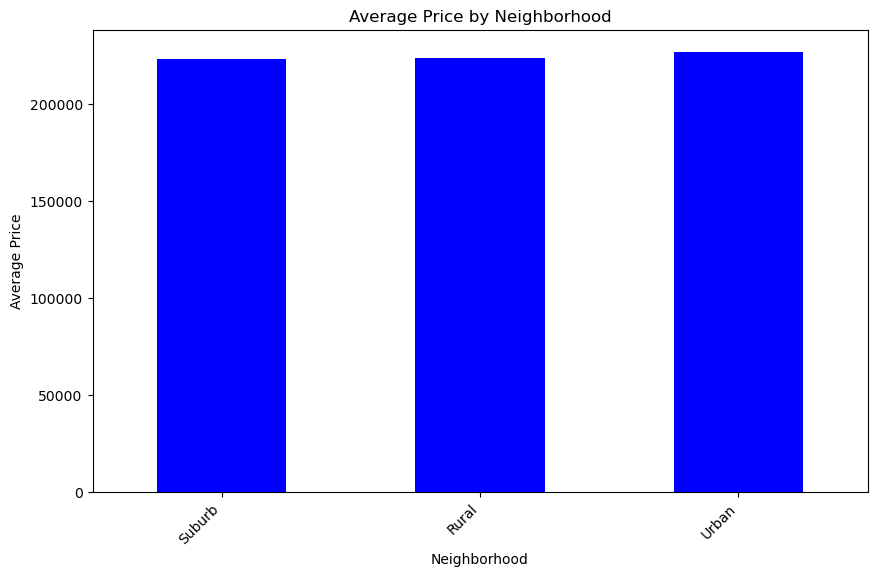

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


neighborhood_prices = df.groupby('Neighborhood')['Price'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
neighborhood_prices.plot(kind='bar', color='blue')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

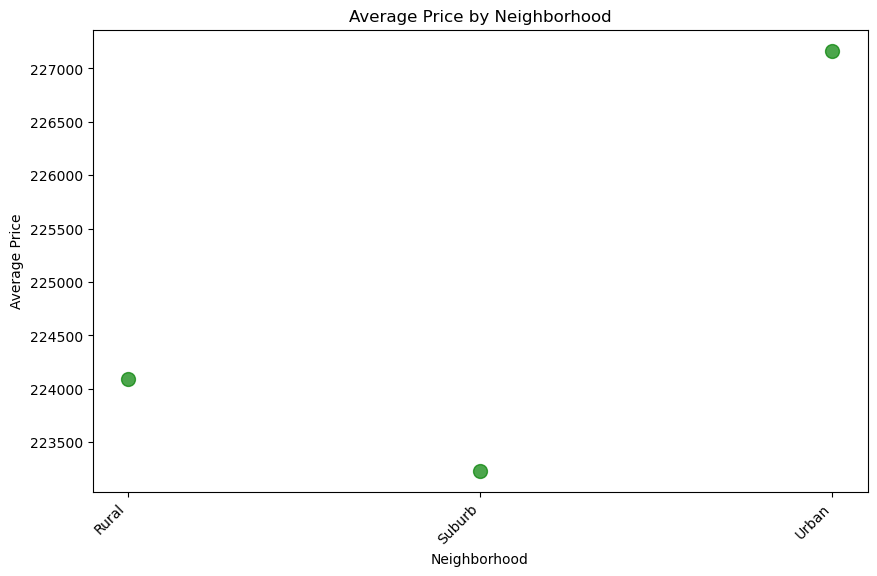

In [51]:
neighborhood_prices = df.groupby('Neighborhood')['Price'].mean()
neighborhood_prices = neighborhood_prices.reset_index() 

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(neighborhood_prices['Neighborhood'], neighborhood_prices['Price'], color='green', s=100, alpha=0.7)
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

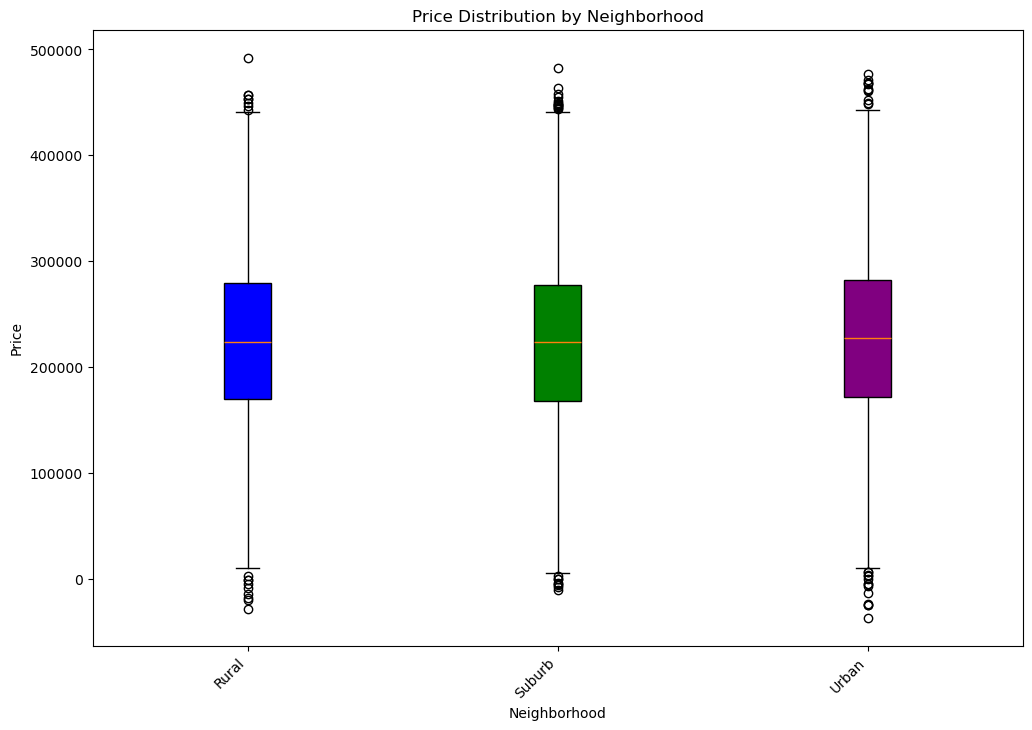

In [52]:

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'purple', 'black']  # Adjust colors as needed

# Iterate through each neighborhood and create a boxplot
for i, neighborhood in enumerate(df['Neighborhood'].unique()):
    neighborhood_data = df[df['Neighborhood'] == neighborhood]
    plt.boxplot(neighborhood_data['Price'], positions=[i], labels=[neighborhood], patch_artist=True, boxprops=dict(facecolor=colors[i]))

# Customize the plot
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()




(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

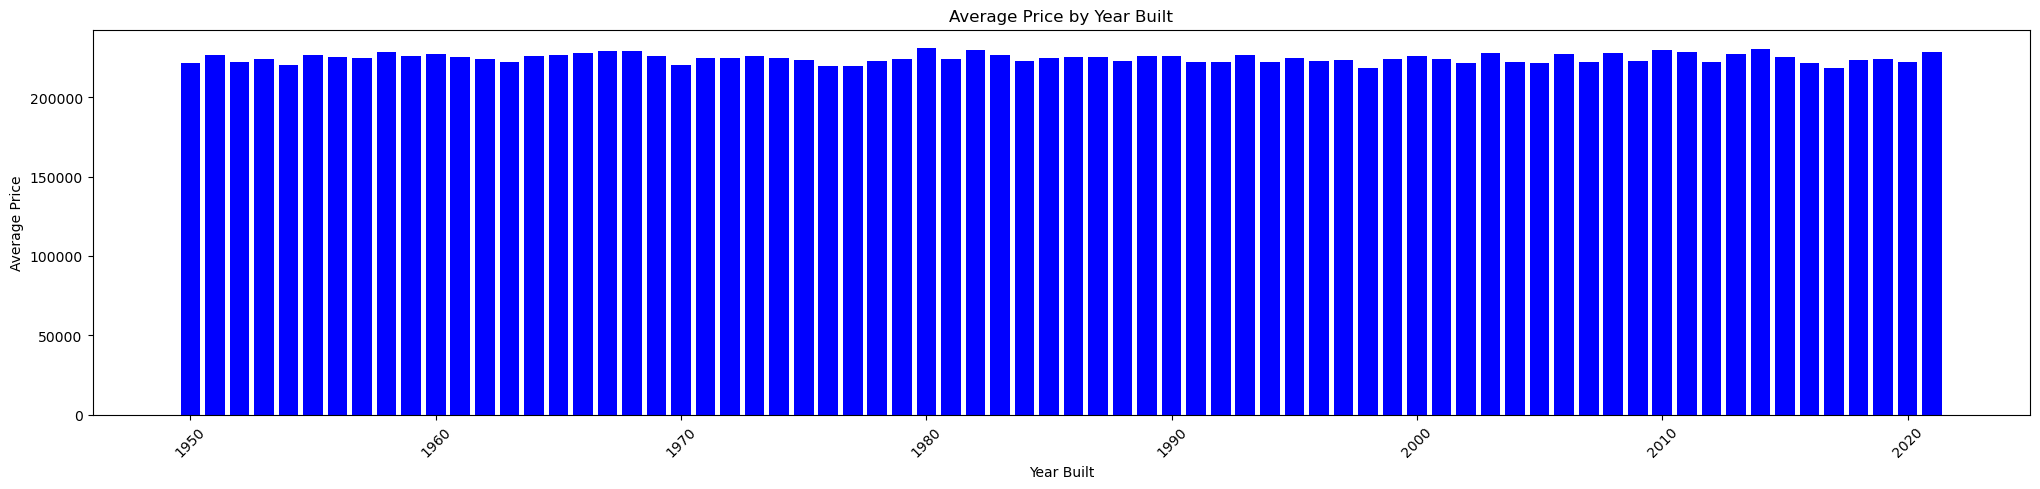

In [53]:
plt.figure(figsize=(25, 5))

# Grouping data by 'YearBuilt' and calculating the mean price for each year
average_prices = df.groupby('YearBuilt')['Price'].mean()

# Creating a bar chart
plt.bar(average_prices.index, average_prices, color='blue')

plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

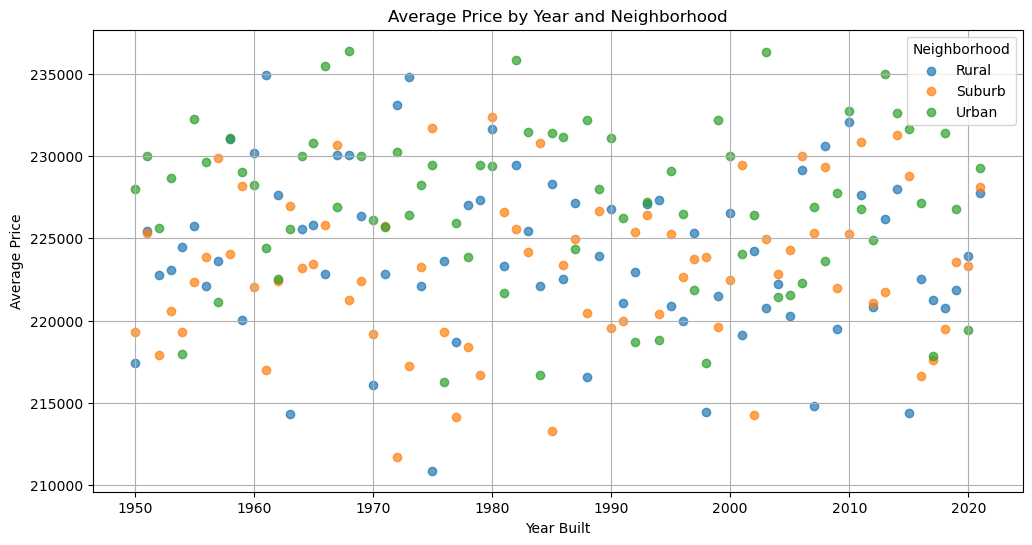

In [54]:
average_prices = df.groupby(['Neighborhood', 'YearBuilt'])['Price'].mean().reset_index()

# Create a scatter plot using matplotlib.pyplot
plt.figure(figsize=(12, 6))

for neighborhood in average_prices['Neighborhood'].unique():
    neighborhood_data = average_prices[average_prices['Neighborhood'] == neighborhood]
    plt.scatter(neighborhood_data['YearBuilt'], neighborhood_data['Price'], label=neighborhood, alpha=0.7)

# Customize the plot
plt.title('Average Price by Year and Neighborhood')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.legend(title='Neighborhood')
plt.grid(True)

# Show the plot
plt.show()
